In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model  import LinearRegression

In [75]:
insurance_data=pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
insurance_data=insurance_data.dropna()
insurance_data['smoker']=insurance_data['smoker'].replace({'yes':1,'no':0}).astype(float)
# insurance_data['smoker']=insurance_data['smoker'].str.replace('no',0).astype(int)
insurance_data['smoker']

C:\Users\Student\AppData\Local\Temp\ipykernel_5612\3365248485.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data['smoker']=insurance_data['smoker'].replace({'yes':1,'no':0}).astype(float)


0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1333    0.0
1334    0.0
1335    0.0
1336    0.0
1337    1.0
Name: smoker, Length: 1338, dtype: float64

In [77]:
X=insurance_data[['age','bmi','smoker']].values
y=insurance_data['charges'].values


In [78]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [79]:
print(f"Bias is {model.intercept_}")
print(f"weight is {model.coef_}") # all three weights for the features
predicted=model.predict(X)
mse=np.mean((y-predicted)**2)
print(f'the MSE is :{mse} ')

Bias is -11676.830425187778
weight is [  259.54749155   322.61513282 23823.68449531]
the MSE is :37005395.750507504 


In [153]:
def compute_loss(weight, bias, features, actual_value):
    predictions = features @ weight + bias  
    return np.mean((predictions - actual_value) ** 2)
    


In [164]:
def gradient_descent_step(weight, bias, features, actual_value, learning_rate=0.0001):
    features=features.to_numpy()
    m = len(features)
    predictions = features @ weight + bias
    loss=predictions-actual_value

    # Compute gradients
    gradient_weight = (2/m) * (features.T @ loss.to_numpy().reshape(-1,1)).flatten()
    gradient_bias = (2/m) * np.sum(loss)

    # Update parameters
    weight -= learning_rate * gradient_weight.reshape(-1)
    bias -= learning_rate * gradient_bias
    return weight, bias



In [165]:
print(X)

      age     bmi  smoker
0      19  27.900     1.0
1      18  33.770     0.0
2      28  33.000     0.0
3      33  22.705     0.0
4      32  28.880     0.0
...   ...     ...     ...
1333   50  30.970     0.0
1334   18  31.920     0.0
1335   18  36.850     0.0
1336   21  25.800     0.0
1337   61  29.070     1.0

[1338 rows x 3 columns]


In [186]:
np.random.seed(42)
weight = np.random.rand(X.shape[1])
bias = np.random.rand()


loss_history =[]
iterations = 1000
learning_rate = 0.000001

for _ in range(iterations):
    weight,bias = gradient_descent_step(weight,bias,X,y, learning_rate)
    loss = compute_loss(weight, bias, X,y)
    loss_history.append(loss)


In [187]:
print(weight[0])


214.9308705787946


In [188]:
print(bias)

5.307449763519486


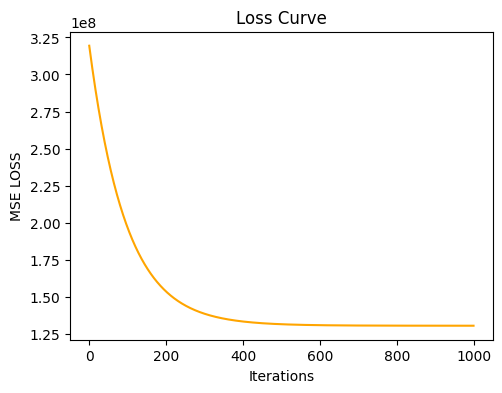

In [189]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(iterations), loss_history, color='orange')
plt.title('Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("MSE LOSS")
plt.show()